<a href="https://colab.research.google.com/github/Ashish-1521/ML-HW/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION 4:**
1.   Pre-processing of data is a step in the cleaning process that is necessary before data classification in order to remove contaminants that limit the model's accuracy.I have eliminated all null values from the data and ignored any information or data that does not aid in categorization, such as the Name column, while filling in the blanks for columns like AGE that include crucial data.Using the interpolate function, which replaces missing values with median values, I have filled in the blanks. These empty values can also be filled up with the mean of all the values in that column.

2. From the data we can find that Name,Cabin,Ticket,SibSp,Ticket,parch does not effect the information and can missclassify the data because the price of ticket may vary from person to person based on the date and time of purchase and similarly all other mentioned features are not useful.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# reading the file
_data = pd.read_csv("/content/sample_data/train.csv")
print(_data.columns)

# Removing unwanted or columns that does not provide much info
unwanted_Col = ["Name","Cabin","Ticket"]
_data = _data.drop(unwanted_Col,axis=1)

# Removing NA/null and duplicate values from columns
_data = _data.dropna()
_data = _data.drop_duplicates()

# Tranforming sex, Embark and Pclass to columns for more information and detailing
new_col = ["Pclass","Sex","Embarked"]
new_data = []
# get_dummies converts the values of column to a set of columns or class of different values.
for c in new_col:
  new_data.append(pd.get_dummies(_data[c]))
new_data = pd.concat(new_data,axis=1) # since the data is in list format we concat the data with a null values for easy conversion
_data = pd.concat((_data,new_data),axis=1)

# Dropping redundant columns, we also drop sex, Pclass, Embarked since these values are transformed to classes/columns and added to the original data.
unwanted_col = ["Pclass","Sex","Embarked","Parch","SibSp"]
_data = _data.drop(unwanted_col,axis=1)

# Use interpolate function to fill all the missing values in the age. Interpolate fills the missing values with the median value
_data["Age"] = _data["Age"].interpolate()
print(_data)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
     PassengerId  Survived   Age     Fare  1  2  3  female  male  C  Q  S
0              1         0  22.0   7.2500  0  0  1       0     1  0  0  1
1              2         1  38.0  71.2833  1  0  0       1     0  1  0  0
2              3         1  26.0   7.9250  0  0  1       1     0  0  0  1
3              4         1  35.0  53.1000  1  0  0       1     0  0  0  1
4              5         0  35.0   8.0500  0  0  1       0     1  0  0  1
..           ...       ...   ...      ... .. .. ..     ...   ... .. .. ..
885          886         0  39.0  29.1250  0  0  1       1     0  0  1  0
886          887         0  27.0  13.0000  0  1  0       0     1  0  0  1
887          888         1  19.0  30.0000  1  0  0       1     0  0  0  1
889          890         1  26.0  30.0000  1  0  0       0     1  1  0  0
890          891         0  32.0 

 QUESTION 4:
 3. I have used the decisiontreeclassifier for tree classification and split the data into 2 halves in which 30% is test data and the remaining 70% is split data. Also classified the data into survived and not survived for detailing.

Accuracy : 0.7990654205607477


[Text(0.5, 0.875, 'x[6] <= 0.5\ngini = 0.474\nsamples = 498\nvalue = [306, 192]\nclass = Survived'),
 Text(0.25, 0.625, 'x[1] <= 6.5\ngini = 0.313\nsamples = 325\nvalue = [262, 63]\nclass = Survived'),
 Text(0.125, 0.375, 'x[0] <= 179.5\ngini = 0.36\nsamples = 17\nvalue = [4, 13]\nclass = Not Survived'),
 Text(0.0625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Survived'),
 Text(0.1875, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = Not Survived'),
 Text(0.375, 0.375, 'x[3] <= 0.5\ngini = 0.272\nsamples = 308\nvalue = [258, 50]\nclass = Survived'),
 Text(0.3125, 0.125, 'gini = 0.188\nsamples = 238\nvalue = [213, 25]\nclass = Survived'),
 Text(0.4375, 0.125, 'gini = 0.459\nsamples = 70\nvalue = [45, 25]\nclass = Survived'),
 Text(0.75, 0.625, 'x[5] <= 0.5\ngini = 0.379\nsamples = 173\nvalue = [44, 129]\nclass = Not Survived'),
 Text(0.625, 0.375, 'x[1] <= 2.5\ngini = 0.124\nsamples = 105\nvalue = [7, 98]\nclass = Not Survived'),
 Text(0.5625, 0.125, 'gini = 

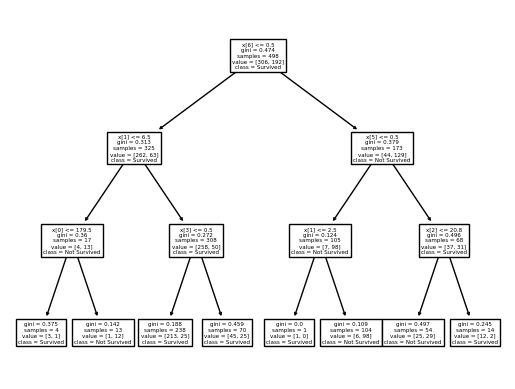

In [17]:
from sklearn.metrics import accuracy_score
X = _data.values
Y = _data["Survived"].values

# X still has survived column values removing the column
X = np.delete(X,1,axis=1)

X_train, X_test, Y_train, Y_real = train_test_split(X,Y,test_size=0.3)

# Using Decision tree classifier for decision tree
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,Y_train)
# print(clf.score)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_real,y_pred)
print("Accuracy :",accuracy)
tree.plot_tree(clf,class_names = ['Survived','Not Survived'])

QUESTION 4:

4. I have used the ShuffleSplit function from Scikit Learn for the cross validation process. In shuffle split the data is replaced for test and training in each and every iteration and used the mean for average accuracy


In [19]:
KFold,
# For 5 fold cross validation we divide the dataset into 5 parts and each time we choose the 4 parts as training set and the remaining as testset
cv = KFold(n_splits=5)
cross_Validation_scores = cross_val_score(clf,X_train,Y_train,cv=cv)
print(cross_Validation_scores.mean())


0.7953939393939395


In [23]:
model_rf = RandomForestClassifier()
model_rf = clf.fit(X_train,Y_train)
y_pred_forest = model_rf.predict(X_test)
y_pred_forest
accuracy_forest = model_rf.score(X_test,Y_real)
accuracy_forest
cross_Validation_scores = cross_val_score(model_rf,X_train,Y_train,cv=cv)
print(cross_Validation_scores.mean())

0.7953939393939395


QUESTION 4:
6. Obviously, I would say that random forest is preferable to decision trees since it combines many decision trees to produce decorrelated trees with more variation and higher throughput than decision trees do at each split.
7. After applying both the algorithms I found that random classifier has more accuracy when compared to decision tree and after applying the performance evaluator which is cross validation in this case gave a better idea of accuracies from both models i.e, DecisionTrees and RandomForest.

**QUESTION 5: **
1. For Bagging, Adaboost I used the functions from Scikit Learn and trained them with training data provided from train_test_split function and later on predicted/classified the test data and the found the accuracy using score method.

In [ ]:
from sklearn.ensemble import BaggingClassifier
classification_1 = tree.DecisionTreeClassifier(max_depth=3)
bagging_classifier = BaggingClassifier(estimator=classification_1,n_estimators=100,random_state=1)
bagging_classifier.fit(X_train,Y_train)
y_pred = bagging_classifier.predict(X_test)
accuracy_score(Y_real, y_pred)

0.7616822429906542

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(learning_rate=1.0,n_estimators=100)
adaBoost.fit(X_train,Y_train)
y_pred = adaBoost.predict(X_test)
accuracy_score(Y_real, y_pred)

0.7570093457943925